In [3]:
import pandas as pd

Dataset 1:- NSL KDD

In [6]:
df_train = pd.read_csv("kdd_train.csv")
df_test = pd.read_csv("kdd_test.csv")

In [8]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [10]:
print(f"Columns with object datatype:- {df_train.dtypes[df_train.dtypes == 'object'].index.tolist()}")

Columns with object datatype:- ['protocol_type', 'service', 'flag', 'labels']


In [12]:
#Converting them to int

#1)Label
df_train['attack_binary'] = df_train['labels'].apply(lambda x: 0 if x=='normal' else 1)
df_test['attack_binary'] = df_test['labels'].apply(lambda x: 0 if x=='normal' else 1)


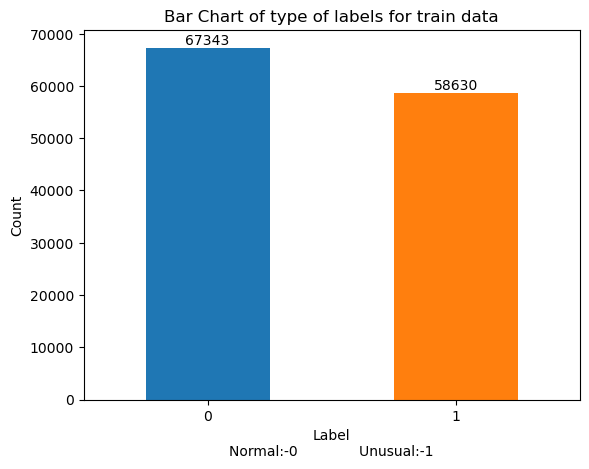

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the value counts
counts = df_train['attack_binary'].value_counts()

bar_colors = ['#1f77b4', '#ff7f0e'] # Example colors: default blue and default orange

# Plot the counts, passing the colors list
ax = counts.plot.bar(color=bar_colors)

# Add the labels on top of the bars
ax.bar_label(ax.containers[0])

# Add labels and a title
plt.xlabel('Label\nNormal:-0              Unusual:-1')
plt.ylabel('Count')
plt.title('Bar Chart of type of labels for train data')
plt.xticks(rotation=0) # Keeps the category labels horizontal for better readability
plt.show()

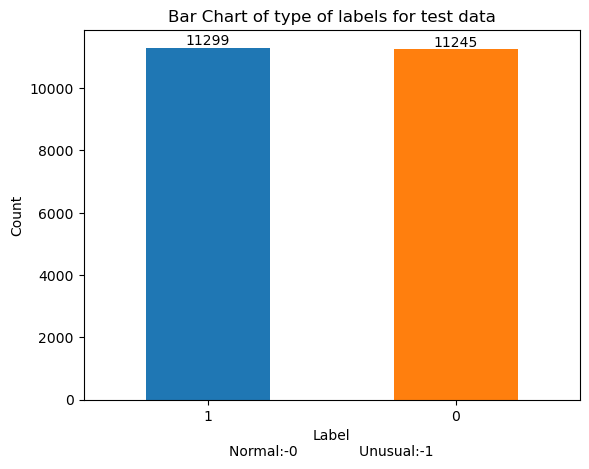

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the value counts
counts = df_test['attack_binary'].value_counts()

bar_colors = ['#1f77b4', '#ff7f0e'] # Example colors: default blue and default orange

# Plot the counts, passing the colors list
ax = counts.plot.bar(color=bar_colors)

# Add the labels on top of the bars
ax.bar_label(ax.containers[0])

# Add labels and a title
plt.xlabel('Label\nNormal:-0              Unusual:-1')
plt.ylabel('Count')
plt.title('Bar Chart of type of labels for test data')
plt.xticks(rotation=0) # Keeps the category labels horizontal for better readability
plt.show()

In [16]:
#Different types of protocol:

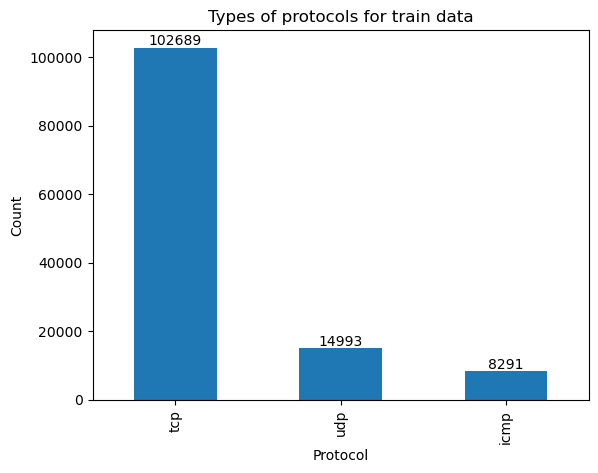

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the value counts (this is fast even with 200,000+ rows)
counts = df_train['protocol_type'].value_counts()

# Plot the counts directly
ax = counts.plot.bar()

# Add the labels on top of the bars
ax.bar_label(ax.containers[0])

# Add labels and a title
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.title('Types of protocols for train data')
plt.show()


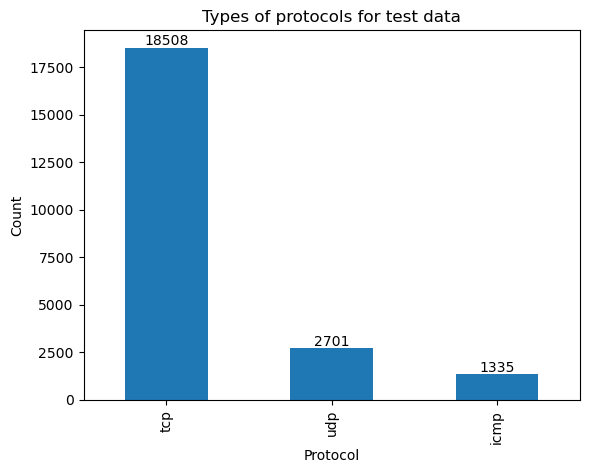

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the value counts (this is fast even with 200,000+ rows)
counts = df_test['protocol_type'].value_counts()

# Plot the counts directly
ax = counts.plot.bar()

# Add the labels on top of the bars
ax.bar_label(ax.containers[0])

# Add labels and a title
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.title('Types of protocols for test data')
plt.show()


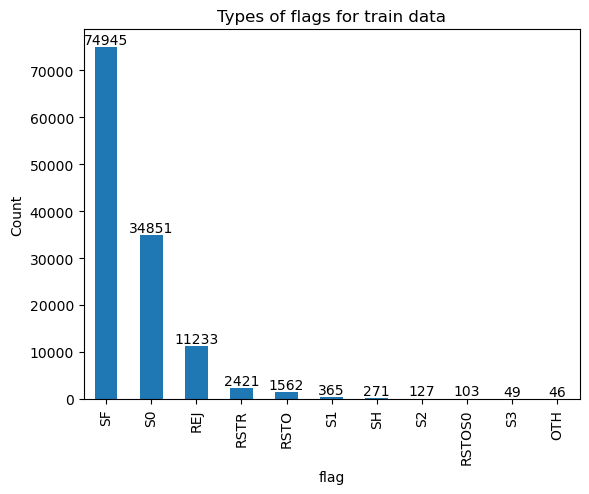

In [20]:
#service
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the value counts (this is fast even with 200,000+ rows)
counts = df_train['flag'].value_counts()

# Plot the counts directly
ax = counts.plot.bar()

# Add the labels on top of the bars
ax.bar_label(ax.containers[0])

# Add labels and a title
plt.xlabel('flag')
plt.ylabel('Count')
plt.title('Types of flags for train data')
plt.show()


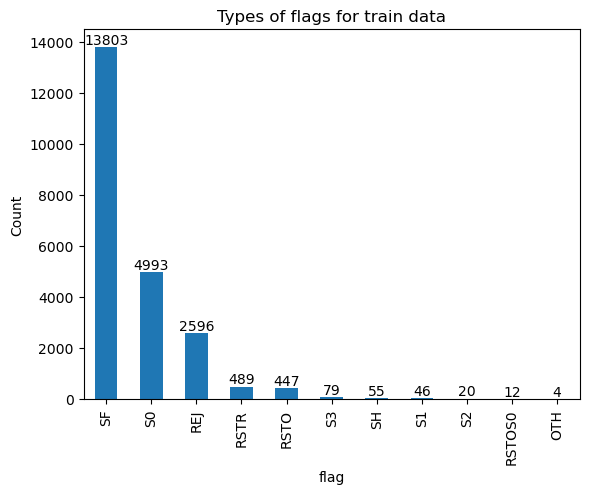

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the value counts (this is fast even with 200,000+ rows)
counts = df_test['flag'].value_counts()

# Plot the counts directly
ax = counts.plot.bar()

# Add the labels on top of the bars
ax.bar_label(ax.containers[0])

# Add labels and a title
plt.xlabel('flag')
plt.ylabel('Count')
plt.title('Types of flags for train data')
plt.show()


Dataset 2:- CICDS

In [31]:
df = pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

In [32]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

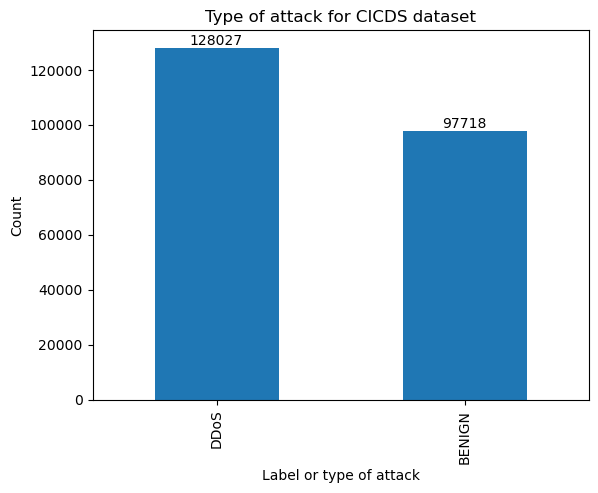

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the value counts (this is fast even with 200,000+ rows)
counts = df[' Label'].value_counts()

# Plot the counts directly
ax = counts.plot.bar()

# Add the labels on top of the bars
ax.bar_label(ax.containers[0])

# Add labels and a title
plt.xlabel('Label or type of attack')
plt.ylabel('Count')
plt.title('Type of attack for CICDS dataset')
plt.show()

In [34]:
max(df[' Flow Duration'])

119999937

C:\Users\91738\AppData\Local\Temp\ipykernel_6992\2000801796.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_data.groupby(['Duration_Bin', 'Label']).size().unstack(fill_value=0).astype(float)


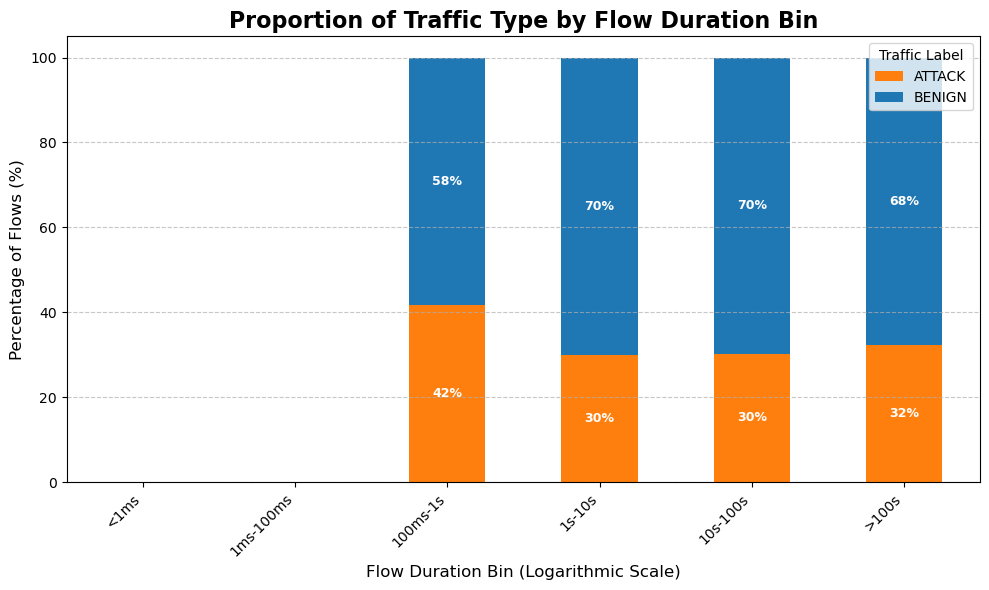

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Assume your DataFrame is df_data
# Replace 'df_data' with the actual name of your DataFrame if necessary.
df_data = pd.DataFrame(data={
    ' Flow Duration': np.random.randint(0, 120000000, 1000), # Dummy data for example
    ' Label': np.random.choice(['BENIGN', 'ATTACK'], 1000, p=[0.7, 0.3]) # Dummy labels
})

# Rename for cleanliness and safety
df_data.columns = df_data.columns.str.strip()
df_data = df_data.rename(columns={'Flow Duration': 'Duration', 'Label': 'Label'})

# --- Step A: Define Bins and Labels ---
# Bins in microseconds (up to 120 million)
bins = [0, 1e3, 1e5, 1e6, 1e7, 1e8, df_data['Duration'].max() + 1]
labels = ['<1ms', '1ms-100ms', '100ms-1s', '1s-10s', '10s-100s', '>100s']

# --- Step B: Create the Binned Column ---
df_data['Duration_Bin'] = pd.cut(df_data['Duration'], 
                                 bins=bins, 
                                 labels=labels, 
                                 right=False, # Interval is [low, high)
                                 include_lowest=True)

# --- Step C: Calculate Proportions (Attack Rate) ---
# Group by the new bin and count labels, then unstack and normalize to 100%
grouped = df_data.groupby(['Duration_Bin', 'Label']).size().unstack(fill_value=0).astype(float)
grouped_pct = grouped.div(grouped.sum(axis=1), axis=0) * 100

# --- Step D: Visualization (Normalized Stacked Bar Chart) ---
plt.figure(figsize=(10, 6))

ax = grouped_pct.plot(kind='bar', stacked=True, 
                      color={'BENIGN': '#1f77b4', 'ATTACK': '#ff7f0e'}, 
                      ax=plt.gca())

# Add title and labels
plt.title('Proportion of Traffic Type by Flow Duration Bin', fontsize=16, fontweight='bold')
plt.xlabel('Flow Duration Bin (Logarithmic Scale)', fontsize=12)
plt.ylabel('Percentage of Flows (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Improve Legend
plt.legend(title='Traffic Label', loc='upper right')

# Add percentage labels inside the bars
for container in ax.containers:
    for patch in container.patches:
        height = patch.get_height()
        width = patch.get_width()
        x = patch.get_x()
        y = patch.get_y()
        
        # Only label if the segment is large enough
        if height > 5: 
            ax.text(x + width / 2., y + height / 2., 
                    f'{height:.0f}%', 
                    ha='center', va='center', 
                    color='white', fontsize=9, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

For Dataset 1

In [43]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features for KDD dataset
categorical_cols = ['protocol_type', 'service', 'flag']

# Initialize encoders
encoders = {}

for col in categorical_cols:
    encoders[col] = LabelEncoder()
    # Fit on combined unique values from both train and test
    combined_values = pd.concat([df_train[col], df_test[col]]).unique()
    encoders[col].fit(combined_values)
    
    # Transform both datasets
    df_train[col + '_encoded'] = encoders[col].transform(df_train[col])
    df_test[col + '_encoded'] = encoders[col].transform(df_test[col])

# Save the encoders for future use
import pickle
with open('kdd_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

In [45]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,attack_binary,protocol_type_encoded,service_encoded,flag_encoded
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.00,0.00,0.00,0.05,0.00,normal,0,1,20,9
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,normal,0,2,44,9
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,neptune,1,1,49,5
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.04,0.03,0.01,0.00,0.01,normal,0,1,24,9
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,normal,0,1,24,9


In [48]:
df_train['protocol_type_encoded'].value_counts()

protocol_type_encoded
1    102689
2     14993
0      8291
Name: count, dtype: int64

For CICDS 

In [51]:
# For CICIDS dataset, encode the label
df['Label_encoded'] = df[' Label'].apply(lambda x: 0 if x.strip().upper() == 'BENIGN' else 1)

# If there are other categorical features, encode them similarly

In [53]:
# Column Consistency Check for KDD Dataset
def verify_column_consistency(df_train, df_test, dataset_name="Dataset"):
    """
    Verify that train and test datasets have consistent columns
    """
    print(f"\n{'='*60}")
    print(f"Column Consistency Check for {dataset_name}")
    print(f"{'='*60}")
    
    train_cols = set(df_train.columns)
    test_cols = set(df_test.columns)
    
    # Check column counts
    print(f"\nTrain columns: {len(train_cols)}")
    print(f"Test columns: {len(test_cols)}")
    
    # Find differences
    only_in_train = train_cols - test_cols
    only_in_test = test_cols - train_cols
    common_cols = train_cols & test_cols
    
    print(f"Common columns: {len(common_cols)}")
    
    if only_in_train:
        print(f"\n⚠️ Columns only in TRAIN: {only_in_train}")
    else:
        print("\n✓ No columns unique to train")
    
    if only_in_test:
        print(f"\n⚠️ Columns only in TEST: {only_in_test}")
    else:
        print("\n✓ No columns unique to test")
    
    # Check data types consistency
    if common_cols:
        print("\n" + "-"*60)
        print("Data Type Consistency Check")
        print("-"*60)
        dtype_mismatches = []
        for col in common_cols:
            if df_train[col].dtype != df_test[col].dtype:
                dtype_mismatches.append({
                    'column': col,
                    'train_dtype': df_train[col].dtype,
                    'test_dtype': df_test[col].dtype
                })
        
        if dtype_mismatches:
            print("\n⚠️ Data type mismatches found:")
            for mismatch in dtype_mismatches:
                print(f"  {mismatch['column']}: train={mismatch['train_dtype']}, test={mismatch['test_dtype']}")
        else:
            print("\n✓ All common columns have consistent data types")
    
    # Summary
    print("\n" + "="*60)
    if not only_in_train and not only_in_test and not dtype_mismatches:
        print("✓ PASSED: Datasets are consistent!")
    else:
        print("⚠️ WARNING: Inconsistencies detected!")
    print("="*60 + "\n")
    
    return {
        'consistent': not only_in_train and not only_in_test and not dtype_mismatches,
        'only_in_train': only_in_train,
        'only_in_test': only_in_test,
        'dtype_mismatches': dtype_mismatches
    }

# Run the check
kdd_consistency = verify_column_consistency(df_train, df_test, "KDD Dataset")


Column Consistency Check for KDD Dataset

Train columns: 46
Test columns: 46
Common columns: 46

✓ No columns unique to train

✓ No columns unique to test

------------------------------------------------------------
Data Type Consistency Check
------------------------------------------------------------

✓ All common columns have consistent data types

✓ PASSED: Datasets are consistent!



In [55]:
# Select final features for modeling
# Exclude original categorical columns and labels from features
feature_cols = [col for col in df_train.columns 
                if col not in ['labels', 'attack_binary', 'protocol_type', 'service', 'flag']]

X_train = df_train[feature_cols]
y_train = df_train['attack_binary']

X_test = df_test[feature_cols]
y_test = df_test['attack_binary']

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"\nFeature columns: {len(feature_cols)}")

Training set shape: (125973, 41)
Test set shape: (22544, 41)

Feature columns: 41


In [57]:
# Save the processed datasets
df_train.to_csv('kdd_train_processed.csv', index=False)
df_test.to_csv('kdd_test_processed.csv', index=False)

# Save feature names
with open('feature_names.txt', 'w') as f:
    for feature in feature_cols:
        f.write(f"{feature}\n")